Vectors
----
Abstractly, vectors are objects that can be added together (to form new vectors) and that can be multiplied by scalars (i.e., numbers), also to form new vectors.

Concretely (for us), vectors are points in some finite dimensional space. Although you might not think of your data as vectors, they are a good way to represent numeric data.

Here's a good article on vectors: https://www.mathsisfun.com/algebra/vectors.html

Vector example:
----

In [1]:
height_weight_age = [70,  # Inches
                     170, # Pounds
                     40]  # Years

grades            = [95,  # exam1
                     80,  # exam2
                     75,  # exam3
                     62]  # exam4

Vector arithmetic:
----
If you check it out, I've added an intuitive example gaussian series $\frac{N(N+1)}{2}$ in A+B as well as B+A:

To explain, imagine counting the numbers from 1 to 100, and adding them all up. The story goes that as a young student, mathematician Johann Gauss was tasked with just that by his teacher. Being in the 1700's, he had no calculator and thus this was a seemingly cumbersome calculation. Gauss realized, however, that in the series, 1 + 2 +...+ N, that if you added the last number of the series with the first (i.e., 1 + 99) and the second number with the second from the last (i.e., 2 + 98), you end up with the value N + 1 every time, which, in this case, is 100.

In the N numbers in the series, you may notice that there $\frac{N}{2}$ pairs of the value N+1 that can be added. If you multiply the sum of the pair by the number of pairs, you're given $\frac{N(N+1)}{2}$, or in this case, $\frac{100(101)}{2}$, or 50 pairs of 101.

Here's an example of that in action:

In [20]:
import numpy as np

# Some example vectors.
a = np.arange(1, 101, 1)
b = np.flip(a, axis=0)

print(b)


# Vector addition
def vector_add(v, w):
    """adds corresponding elements"""
    return [v_i + w_i for v_i, w_i in zip(v, w)]

# Vector subtraction
def vector_sub(v, w):
    """subtracts corresponding elements"""
    return [v_i - w_i for v_i, w_i in zip(v, w)]

aplusb = vector_add(a, b)
bplusa = vector_add(b, a)
aminb  = vector_sub(a, b)
bmina  = vector_sub(b, a)

print("Vector A+B:")
print(aplusb)
print("\nVector A-B:")
print(aminb)
print("\nVector B+A:")
print(bplusa)
print("\nVector B-A")
print(bmina)

[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1]
Vector A+B:
[101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101]

Vector A-B:
[-99, -97, -95, -93, -91, -89, -87, -85, -83, -81, -79, -77, -75, -

Vector Sum:
----
Now, the next part is confirming that this works using vector summations:

In [41]:
def vector_sum(vectors):
    """sums all corresponding elements"""
    result = vectors[0]                     # Start with the first vector
    for vector in vectors[1:]:              # then loop over the others
        result = vector_add(result, vector) # and add them to the result
    return result

bot = np.arange(1 , 51, 1)                  # First 50 numbers in the series
top = np.flip(np.arange(51,101, 1), axis=0) # Second 50 numbers in the seres, flipped for alignment.

print("Let's create a vector, C, by adding the highest and lowest N/2 numbers in the series:")
c   = vector_sum((bot, top))
tmp = np.array(c)
print(tmp)

print("\nHow many 101's is that?:")
print(tmp.size)

print("\nSum of the vector, C:")
print(sum(tmp))

print("\nOriginal A:")
print(a)

print("\nSum of the vector, A (Same as the series proof vector, C):")
print(sum(a))

Let's create a vector, C, by adding the highest and lowest N/2 numbers in the series:
[101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
 101 101 101 101 101 101 101 101 101 101 101 101 101 101]

How many 101's is that?:
50

Sum of the vector, C:
5050

Original A:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]

Sum of the vector, A (Same as the series proof vector, C):
5050


For a little extra fun, here's a visualization of A and C:
----

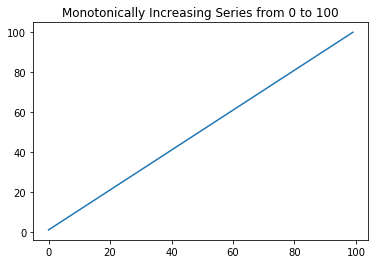

In [43]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

x_1 = np.arange(100)
x_2 = np.arange(50)

plt.plot(x_1, a)
plt.title("Monotonically Increasing Series from 0 to 100")

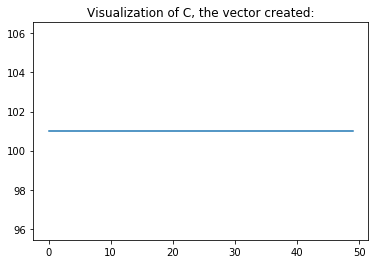

In [44]:
plt.plot(x_2, c)
plt.title("Visualization of C, the vector created:")

Intuition:
----
If you see, the graph of A looks like a triangle, and C a rectangle. Keep in mind, both A and C have the same amount of volume under the line. Essentially, what we've done is exposed the geometry of the series by realizing we could cut that triange in half, and produce a much more easily derivable sum in the form of a rectangle, or in other words, we've simply reduced this cumbersome addition exercise to a much more compact formula which we've verified holds true.